In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

plt.rcParams['font.family']='NanumGothic'

# 두 개의 CSV 파일을 읽어오기
covid_data = pd.read_csv('중국_코로나.csv')
sales_data = pd.read_csv('중국_판매액.csv')

# 두 데이터프레임을 '연도'와 '분기'를 기준으로 병합
merged_data = pd.merge(covid_data, sales_data, on=['년도', '분기'], how='inner')


회귀식의 계수 (기울기): -0.06084319201735781
회귀식의 절편: 809095.3289400078


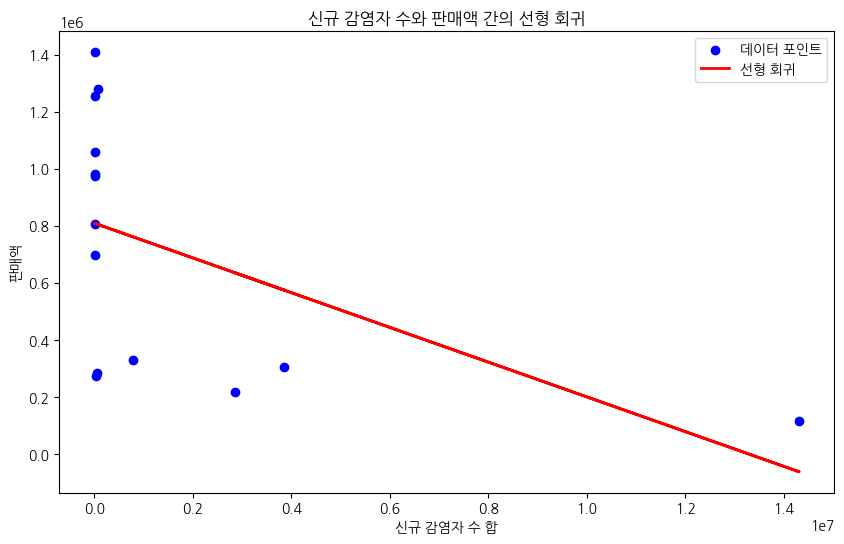

In [3]:
from sklearn.linear_model import LinearRegression
df_combined = pd.merge(covid_data, sales_data, on=['년도', '분기'])

# 선형 회귀 모델 생성
model = LinearRegression()
X = df_combined['신규 감염자 수 합'].values.reshape(-1, 1)
y = df_combined['판매액'].values.reshape(-1, 1)
model.fit(X, y)

# 회귀식의 계수 및 절편 출력
print(f'회귀식의 계수 (기울기): {model.coef_[0][0]}')
print(f'회귀식의 절편: {model.intercept_[0]}')

# 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='데이터 포인트')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='선형 회귀')
plt.title('신규 감염자 수와 판매액 간의 선형 회귀')
plt.xlabel('신규 감염자 수 합')
plt.ylabel('판매액')
plt.legend()
plt.show()

C:\Users\tlsdb\AppData\Local\Temp\ipykernel_96500\1205301597.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 간격 조절
C:\Users\tlsdb\anaconda3\envs\sda2023\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


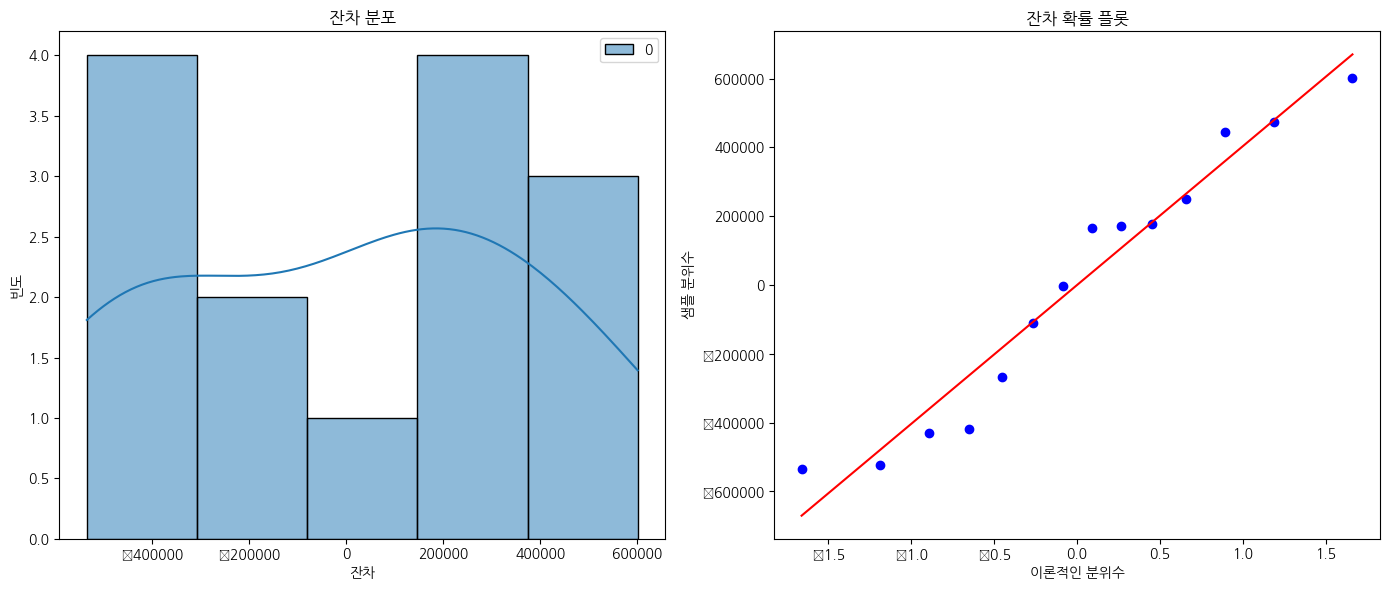

In [6]:
#linear regression 2번째 조건 (잔차가 정규분포 형태여야 한다.)
#1번째 조건은 위에 scatterplot으로 판단할 수 있음.

# 예측 만들기
predictions = model.predict(X)

# 잔차 계산
residuals = y - predictions

# 히스토그램과 확률 플롯을 포함한 그림 만들기
plt.figure(figsize=(14, 6))

# 히스토그램과 KDE
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue')
plt.title('잔차 분포')
plt.xlabel('잔차')
plt.ylabel('빈도')

# 확률 플롯
plt.subplot(1, 2, 2)
probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('잔차 확률 플롯')
plt.xlabel('이론적인 분위수')
plt.ylabel('샘플 분위수')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


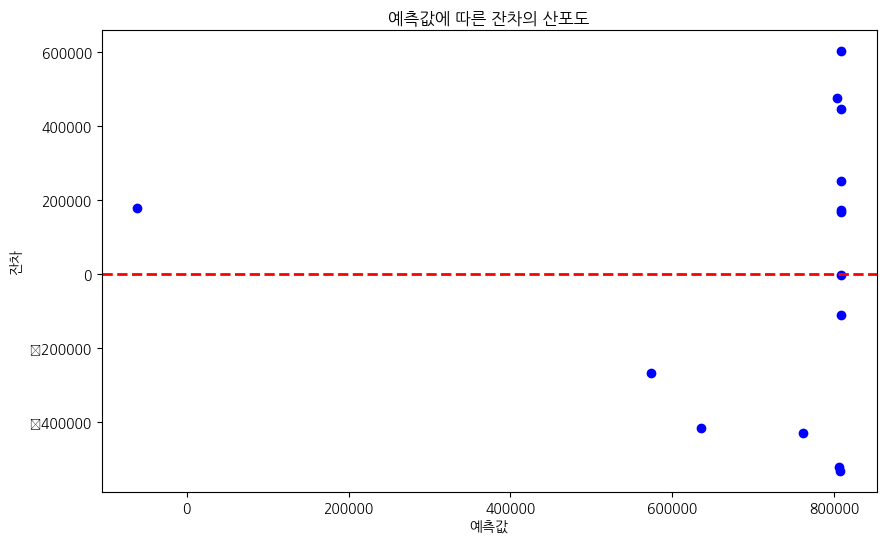

In [7]:
#linear regression 3번째 조건 

# 예측 값에 따른 잔차의 산포도
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # 잔차가 0인 기준선 추가
plt.title('예측값에 따른 잔차의 산포도')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()